### Centro Universitário Senac  
**Professor:** Rafael Cóbe  
**Disciplina:** Introdução ao Aprendizado de Máquina  

### Exercício 2 - **Regressão Linear Univariada**

**Renato Calabro (calabro@live.com)**
**Ágata Oliveira (agata.aso@hotmail.com)**
**Lucas Parisi (parisi.lucas@gmail.com)**
**Douglas Carvalho Rocha (douglas.particular@gmail.com)**
**Angel Guillermo Morales Romero (aguilhermemr@gmail.com)**

In [ ]:
!../.venv/bin/python --version
%pip install -r ../requirements.txt
# %pip install numpy pandas matplotlib seaborn scikit-learn ipkernel
# %pip freeze > requirements.txt
%pip install gdown

In [ ]:
# !mkdir -p data/
# !gdown https://drive.google.com/uc?id=1zcsUU6neakc2_BnATvvsLekvMyz1cztM -O data/
# !gdown https://drive.google.com/uc?id=1zZdavmX2Zlhfe9up-25rXvE3v0HF9Ajd -O data/

# baixados manualmente para trabalhar fora do ambiente do Colab autenticado

In [119]:
import math
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [6]:

from pathlib import Path
base_path = Path("../datasets/regression_data")

In [118]:
def plot_regression_results(model_infos: dict, predictions: dict, df: 'pd.DataFrame', target_col: str):
    features = list(model_infos.keys())
    y_true = df[target_col]
    y_min, y_max = y_true.min(), y_true.max()

    # Subplots em grid (2 colunas)
    cols = 2
    rows = math.ceil(len(features) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(10, 3 * rows))
    axes = axes.flatten()

    for i, feat in enumerate(features):
        ax = axes[i]
        x = df[feat]
        y_pred = predictions[feat]

        ax.scatter(x, y_true, color='blue', label='Dados')
        ax.plot(x, y_pred, color='red', label='Regressão')
        ax.set_title(f"{feat} (R² = {model_infos[feat]['r2']:.2f})")
        ax.set_xlabel(feat)
        ax.set_ylabel(target_col)
        ax.set_ylim(y_min, y_max)
        ax.legend()

    # Remove subplots extras se houver
    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])


In [59]:
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())

def calc_r2(y,predicted):
    return r2_score(predicted,y)

In [7]:
advertising_file = base_path / "Advertising.csv"

if advertising_file.exists():
    df_advertising = pd.read_csv(
        advertising_file,
        sep=',',
    )
    df_advertising.rename(columns={df_advertising.columns[0]: 'id'}, inplace=True)
    display(df_advertising.head())
else:
    print(f"Arquivo não encontrado: {advertising_file.resolve()}")

,id,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
house_prices_file = base_path / "Portland_housePrices.csv"

if house_prices_file.exists():
    df_houses = pd.read_csv(
        house_prices_file,
        sep=',',
    )
    display(df_houses.head())
else:
    print(f"Arquivo não encontrado: {house_prices_file.resolve()}")

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### Treine modelos lineares na base <i>Portland_housePrices.csv</i> utilizando apenas um dos atributos preditores.
1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com <i>tamanho</i> ou com <i>número de quartos</i>?
2) O RSS e R^2 corroboram suas impressões observando o modelo?


In [47]:
X_houses = df_houses.drop(columns=['preco'], inplace=False)
y_houses = df_houses['preco']

preds_houses = {}

house_models = {
    feature: {
        'model': LinearRegression().fit(X_houses[[feature]], df_houses['preco']),
        'feature': feature
    } for feature in X_houses.columns
}

for feature, model_info in house_models.items():
    model = model_info['model']
    feature = model_info['feature']

    preds_houses[feature] = model.predict(X_houses[[feature]])

    model_info['coef_'] = model.coef_
    model_info['intercept_'] = model.intercept_
    model_info['rss'] = calc_rss(y = df_houses['preco'], predicted = preds_houses[feature])
    model_info['r2'] = calc_r2(y = df_houses['preco'], predicted = preds_houses[feature])

##### Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com <i>tamanho</i> ou com <i>número de quartos</i>?

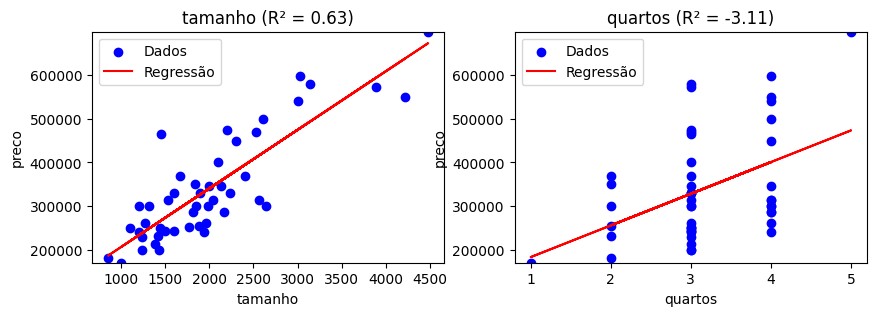

In [48]:
plot_regression_results(house_models, preds_houses, df=df_houses, target_col='preco')

O modelo com `tamanho` é mais razoável:
- A nuvem de pontos mostra uma **tendência clara de crescimento**: quanto maior o tamanho, maior o preço.
- A **linha de regressão se ajusta bem** aos dados, refletindo essa tendência.
- O coeficiente de determinação **R² = 0.63** indica que o modelo explica **63% da variação no preço**, o que é um bom resultado para um modelo univariado.


O modelo com `quartos` é inadequado:
- Os valores da feature estão agrupados em poucos pontos inteiros (1 a 5), resultando em **baixa variabilidade no eixo X**.
- A **linha de regressão não representa bem os dados** — ela passa entre grupos de pontos sem captar uma tendência clara.
- O **R² negativo (-3.11)** mostra que o modelo tem um desempenho pior do que simplesmente prever a média do preço para todos os casos.

---

*Conclusão*:
> **O modelo treinado com `tamanho` é mais razoável**, tanto visual quanto estatisticamente.  
> Ele consegue capturar uma relação linear coerente entre o tamanho do imóvel e o preço.  
> Já `quartos`, isoladamente, **não é um bom preditor** e não fornece informações úteis para o modelo.


In [49]:
print("Coeficientes e métricas dos modelos:")
for feature, model_info in house_models.items():
    print(f"Feature: {feature}")
    print(f"  Coeficiente: {model_info['coef_']}")
    print(f"  Intercepto: {model_info['intercept_']}")
    print(f"  RSS: {model_info['rss']}")
    print(f"  R²: {model_info['r2']:.4f}\n")


Coeficientes e métricas dos modelos:
Feature: tamanho
  Coeficiente: [134.52528772]
  Intercepto: 71270.49244872917
  RSS: 193464477600.7059
  R²: 0.6320

Feature: quartos
  Coeficiente: [72669.64776358]
  Intercepto: 110034.41453674121
  RSS: 578535325112.5249
  R²: -3.1126



##### O RSS e R² corroboram suas impressões observando o modelo?

✅ `tamanho`:
- **RSS (Soma dos Quadrados dos Resíduos)**: `193.464.477.600`  
  → Um valor relativamente **baixo**, indicando que os erros entre as predições e os valores reais são pequenos.
- **R² = 0.63**  
  → Mostra que o modelo explica **63% da variabilidade do preço**, o que **confirma visualmente** o bom ajuste da reta.

**Conclusão**: Esses valores **reforçam a impressão visual** de que `tamanho` é um bom preditor.

---

❌ `quartos`:
- **RSS = 578.535.325.112**  
  → Muito **mais alto** que o RSS do modelo anterior, indicando **maiores erros de predição**.
- **R² = -3.11**  
  → Um valor **negativo**, que significa que o modelo é **pior do que simplesmente prever a média do preço**.

**Conclusão**: Esses números **confirmam a má qualidade visual do modelo com `quartos`**, que não segue a distribuição dos dados nem contribui para explicação da variável dependente.

---

*Conclusão Final*:
> Sim, **os valores de RSS e R² confirmam as impressões visuais**:  
> O modelo com `tamanho` apresenta bom desempenho, enquanto o modelo com `quartos` é inadequado tanto estatisticamente quanto visualmente.


#### Treine modelos lineares na base <i>Advertising.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com TV, radio ou newspaper?
2) Qual dos modelos é melhor? como você chegou a esta conclusão?

In [76]:
X_advertising = df_advertising.drop(columns=['id', 'sales'], inplace=False)
y_advertising = df_advertising['sales']

preds_advertising = {}

advertising_models = {
    feature: {
        'model': LinearRegression().fit(X_advertising[[feature]], y_advertising),
        'feature': feature
    } for feature in X_advertising.columns
}

for feature, model_info in advertising_models.items():
    model = model_info['model']
    feature = model_info['feature']

    preds_advertising[feature] = model.predict(X_advertising[[feature]])

    model_info['coef_'] = model.coef_
    model_info['intercept_'] = model.intercept_
    model_info['rss'] = calc_rss(y_advertising, predicted = preds_advertising[feature])
    model_info['r2'] = calc_r2(y_advertising, predicted = preds_advertising[feature])

##### Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com TV, radio ou newspaper?

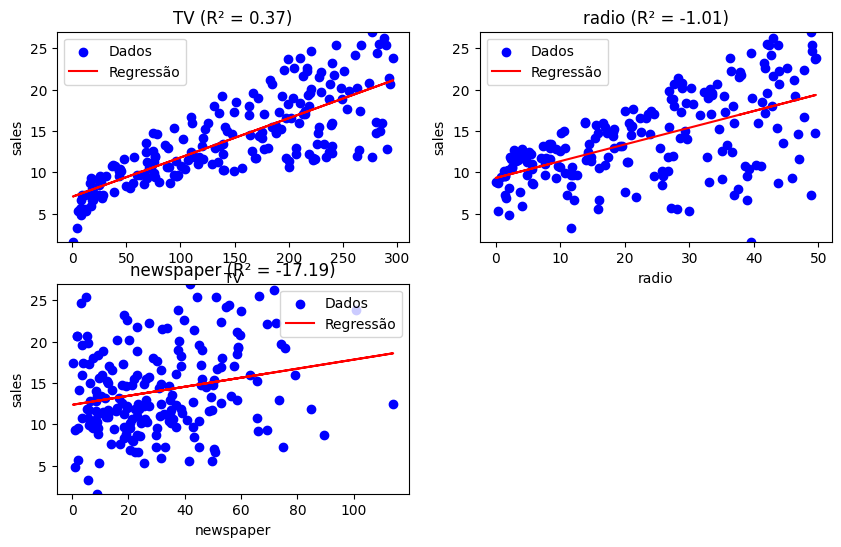

In [55]:
plot_regression_results(advertising_models, preds_advertising, df=df_advertising, target_col='sales')

✅ TV (gráfico superior esquerdo)
- Os pontos seguem uma **tendência de crescimento clara**: quanto maior o investimento em TV, maior o número de vendas.
- A **linha de regressão acompanha bem a distribuição dos dados**, passando pelo centro da nuvem de pontos.
- Existe **coerência visual** entre os dados e a reta ajustada.

Conclusão: O modelo com a feature **TV** parece ser o mais razoável com base apenas na observação gráfica.



⚠️ radio (gráfico superior direito)
- A linha de regressão possui leve inclinação positiva, mas os pontos estão **muito dispersos ao redor dela**.
- Não há uma tendência visual forte que conecte investimento em rádio com aumento nas vendas.
- A dispersão sugere **baixa capacidade explicativa**.

Conclusão: O modelo com **radio** não parece muito confiável visualmente — a relação com `sales` é fraca e ruidosa.



❌ newspaper (gráfico inferior esquerdo)
- Os pontos estão **altamente espalhados**, sem nenhuma direção clara.
- A linha de regressão parece **colocada arbitrariamente** no meio de um grande ruído.
- Não se percebe nenhuma relação linear entre investimento em jornal e número de vendas.

Conclusão: Visualmente, **não há relação linear aparente** entre `newspaper` e `sales`. O modelo não é razoável.

---

**Conclusão final**:
> **Com base apenas na observação visual dos gráficos**, o modelo treinado com a variável `TV` é o que apresenta a relação mais clara e consistente com as vendas.  
> Os modelos com `radio` e `newspaper` mostram alta dispersão e ausência de padrão visual, o que indica que essas variáveis, isoladamente, **não são bons preditores lineares de `sales`**.


##### Qual dos modelos é melhor? como você chegou a esta conclusão?

In [62]:
print("Coeficientes e métricas dos modelos:")
for feature, model_info in advertising_models.items():
    print(f"Feature: {feature}")
    print(f"  Coeficiente: {model_info['coef_']}")
    print(f"  Intercepto: {model_info['intercept_']}")
    print(f"  RSS: {model_info['rss']}")
    print(f"  R²: {model_info['r2']:.4f}\n")

Coeficientes e métricas dos modelos:
Feature: TV
  Coeficiente: [0.04753664]
  Intercepto: 7.032593549127695
  RSS: 2102.5305831313512
  R²: 0.3657

Feature: radio
  Coeficiente: [0.20249578]
  Intercepto: 9.311638095158283
  RSS: 3618.479549025088
  R²: -1.0118

Feature: newspaper
  Coeficiente: [0.0546931]
  Intercepto: 12.35140706927816
  RSS: 5134.804544111939
  R²: -17.1863



O **modelo com a variável `TV`** é claramente o melhor entre os três.

**R² (Coeficiente de determinação)**
- **TV**: `R² = 0.3657` → explica cerca de **36,6% da variabilidade** nas vendas.
- **radio**: `R² = -1.0118` → o modelo é **pior do que simplesmente prever a média**.
- **newspaper**: `R² = -17.1863` → desempenho **extremamente ruim**, indicando que a regressão está totalmente desalinhada com os dados.

**Conclusão**: Apenas o modelo com `TV` apresenta um **R² positivo e aceitável**.

**RSS (Soma dos Quadrados dos Resíduos)**
- **TV**: `RSS = 2102.53` (menor erro total)
- **radio**: `RSS = 3618.48`
- **newspaper**: `RSS = 5134.80` (maior erro)

**Conclusão**: O modelo com `TV` tem o **menor erro entre predição e realidade**.



---

Resumo final:

| Feature     | R²       | RSS       | Conclusão                        |
|-------------|----------|-----------|----------------------------------|
| **TV**      | 0.3657   | 2102.53   | ✅ Melhor modelo                 |
| radio       | -1.0118  | 3618.48   | ❌ Desempenho inferior           |
| newspaper   | -17.1863 | 5134.80   | ❌ Extremamente inadequado       |



> **Conclusão:** O modelo treinado com `TV` é o melhor porque apresenta **menor erro**, **R² positivo** e **alinha-se visualmente com os dados**.  
> Os demais modelos são estatisticamente fracos e devem ser descartados para uso isolado.


#### Compare os resultados das duas regressões com a implemtação do KNN-Regressor visto na aula passada.


In [96]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_advertising[['TV']], y_advertising)
y_pred_knn = knn.predict(X_advertising[['TV']])

tv_info = advertising_models['TV']
y_pred_lin = preds_advertising['TV']

print("Regressão Linear:")
print(f"  MSE: {mean_squared_error(y_advertising, y_pred_lin):.2f}")
print(f"  R²: {r2_score(y_advertising, y_pred_lin):.4f}")

print("\nKNN Regressor (k=10):")
print(f"  MSE: {mean_squared_error(y_advertising, y_pred_knn):.2f}")
print(f"  R²: {r2_score(y_advertising, y_pred_knn):.4f}")

Regressão Linear:
  MSE: 10.51
  R²: 0.6119

KNN Regressor (k=10):
  MSE: 9.91
  R²: 0.6342


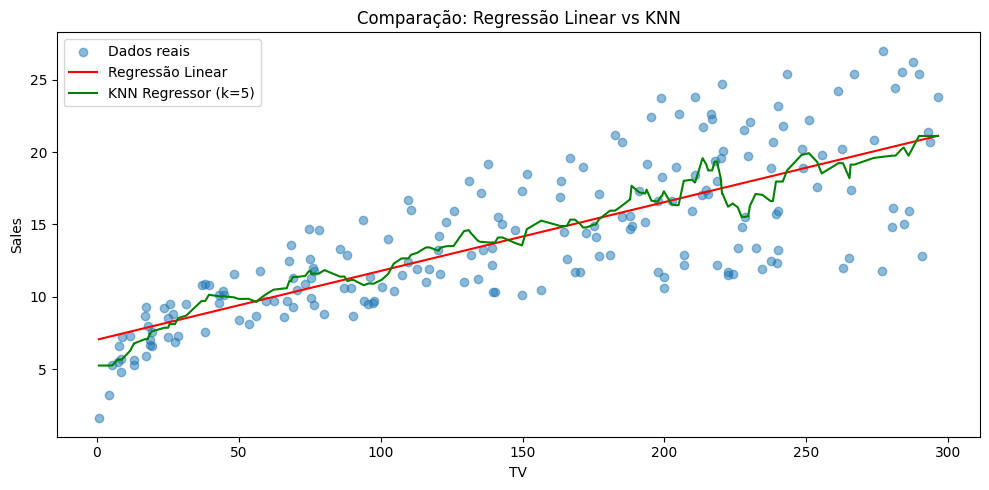

In [98]:
plt.figure(figsize=(10, 5))

sorted_idx = X_advertising['TV'].argsort()
X_sorted = X_advertising[['TV']].iloc[sorted_idx]
y_sorted = y_advertising.iloc[sorted_idx]
y_pred_linear_sorted = y_pred_lin[sorted_idx]
y_pred_knn_sorted = y_pred_knn[sorted_idx]

plt.scatter(X_advertising[['TV']], y_advertising, label='Dados reais', alpha=0.5)
plt.plot(X_sorted, y_pred_linear_sorted, label='Regressão Linear', color='red')
plt.plot(X_sorted, y_pred_knn_sorted, label='KNN Regressor (k=5)', color='green')

plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Comparação: Regressão Linear vs KNN')
plt.legend()
plt.tight_layout()
plt.show()

##### Comparação entre Regressão Linear e KNN Regressor (k=10)
Métricas:

| Modelo              | MSE   | R²     |
|---------------------|-------|--------|
| Regressão Linear    | 10.51 | 0.6119 |
| KNN Regressor (k=10)|  9.91 | 0.6342 |


- O **KNN Regressor (k=10)** teve um desempenho **ligeiramente melhor** que a Regressão Linear:
  - **Menor erro médio quadrático (MSE)**: 9.91 vs 10.51
  - **Maior R²**: 0.6342 vs 0.6119

- No gráfico, o **KNN se ajusta melhor às variações locais** dos dados, resultando em uma linha mais flexível e próxima dos pontos reais.

- A **Regressão Linear**, por outro lado, assume uma **relação puramente linear** e não consegue capturar certas oscilações nos dados.

**Conclusão**:

> Embora os dois modelos apresentem desempenho semelhante, o **KNN Regressor com k=10** obteve **melhor ajuste aos dados**, tanto em termos de erro quanto de explicação da variabilidade.  
> Ele é uma boa alternativa quando se deseja capturar padrões mais complexos em dados univariados.


#### Utilizando a API do scikit-learn para criação de partições de treino e teste, refaça a sua regressão nas partições de treino e faça a validação nas partições de teste.

    1. Comparar os resultados na partição de treino e teste;
    2. Comparar desempenho com a regressão na qual não foi feita a separação entre treino e teste. Você acha que o desempenho deveria ser melhor ou pior nesse caso? É possível dizer que os modelos treinados no dataset completo generalizam?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_advertising[['TV']], y_advertising, test_size=0.2, random_state=42
)

In [106]:
# --- Regressão Linear ---
lin_model = LinearRegression()

# Treinamento com partição
lin_model.fit(X_train, y_train)
y_train_lin = lin_model.predict(X_train)
y_test_lin = lin_model.predict(X_test)

# Treinamento com dataset completo
lin_model_full = LinearRegression().fit(X_advertising[['TV']], y_advertising)
y_full_lin = lin_model_full.predict(X_advertising[['TV']])

# Métricas
print("Treino:")
print(f"  MSE: {mean_squared_error(y_train, y_train_lin):.2f}")
print(f"  R²: {r2_score(y_train, y_train_lin):.4f}")

print("\nTeste:")
print(f"  MSE: {mean_squared_error(y_test, y_test_lin):.2f}")
print(f"  R²: {r2_score(y_test, y_test_lin):.4f}")

print("\nCompleto:")
print(f"  MSE: {mean_squared_error(y_advertising, y_full_lin):.2f}")
print(f"  R²: {r2_score(y_advertising, y_full_lin):.4f}")

Treino:
  MSE: 10.60
  R²: 0.5912

Teste:
  MSE: 10.20
  R²: 0.6767

Completo:
  MSE: 10.51
  R²: 0.6119


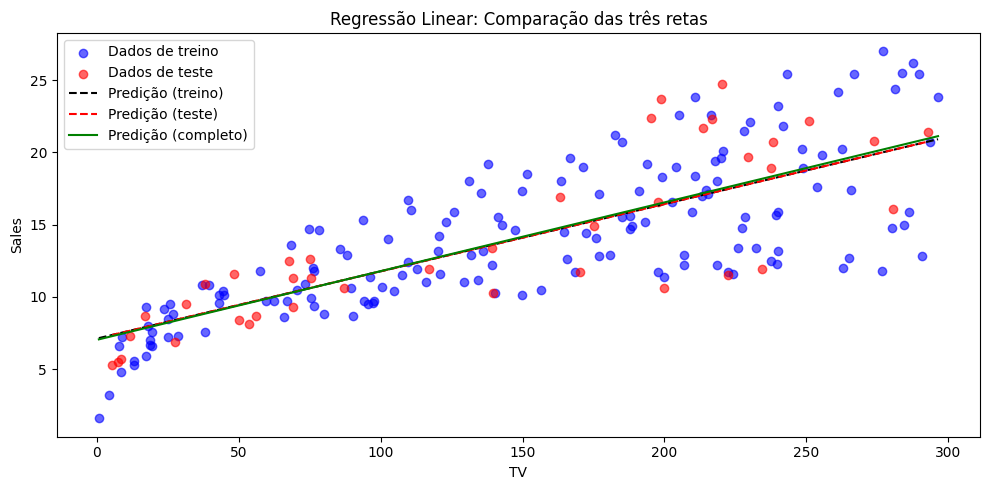

In [116]:
plt.figure(figsize=(10, 5))

# Pontos de treino e teste
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Dados de treino')
plt.scatter(X_test, y_test, color='red', alpha=0.6, label='Dados de teste')

X_sorted = X_advertising[['TV']].sort_values(by='TV')

plt.plot(
    X_sorted,
    lin_model.predict(X_sorted),
    color='black',
    linestyle='--',
    label='Predição (treino)'
)

X_test_sorted = X_test[['TV']].sort_values(by='TV')
plt.plot(
    X_test_sorted,
    lin_model.predict(X_test_sorted),
    color='red',
    linestyle='--',
    label='Predição (teste)'
)

plt.plot(
    X_sorted,
    lin_model_full.predict(X_sorted),
    color='green',
    linestyle='-',
    label='Predição (completo)'
)

plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Regressão Linear: Comparação das três retas')
plt.legend()
plt.tight_layout()
plt.show()


| Conjunto   | MSE   | R²     |
|------------|--------|--------|
| Treino     | 10.60 | 0.5912 |
| Teste      | 10.20 | 0.6767 |
| Completo   | 10.51 | 0.6119 |

---

**Comparação entre treino e teste**

- O modelo teve um desempenho **levemente melhor no conjunto de teste** (R² = 0.6767) do que no próprio conjunto de treino (R² = 0.5912), o que é um sinal positivo.
- Isso pode ocorrer quando os dados de teste estão mais alinhados com a tendência linear do modelo do que os dados de treino.
- **O MSE também é menor no teste**, o que reforça a boa capacidade de generalização do modelo.
- **Conclusão:** O modelo está **bem ajustado**, sem sinais de overfitting.


**Comparação com o modelo treinado no dataset completo**

- O modelo treinado com todos os dados obteve um R² = 0.6119, que está **entre os valores de treino e teste**.
- Isso é esperado, já que ele tem acesso a mais dados, mas **não é avaliado com dados verdadeiramente "novos"**.
- O desempenho do modelo completo parece razoável, mas **não permite avaliar a generalização com confiança**.

---

**Conclusão geral**

> A separação entre treino e teste mostrou que o modelo de regressão linear está **generalizando bem**, com desempenho até melhor no teste do que no treino.  
> Já o modelo treinado com todos os dados não apresenta grande vantagem e **não pode ser usado para avaliar a performance real do modelo em dados novos**.  
> Portanto, **validar com partições é essencial para garantir robustez e evitar ilusões de desempenho**.
